<a href="https://colab.research.google.com/github/meshalalsultan/Full_Vs_Flat_Cnn_With_TensorFlow/blob/main/Copy_of_Tire_Fall_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Full vs Flat Tire Images 

## Classify images of properly Filled and Underfilled Tires

The Contest and information about the data will be found here :

https://github.com/meshalalsultan/Full_Vs_Flat_Cnn_With_TensorFlow/blob/main/README.md

### Get the data throw kaggel api


I get the data throw kaggle , and split them in respect to eatch class in floder name tire_dataset.zip , witch can found in https://github.com/meshalalsultan/Full_Vs_Flat_Cnn_With_TensorFlow/blob/main/tire_dataset.zip

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
#/content/drive/MyDrive/tire_dataset.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/tire_dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
ls tire_dataset

test/  train/


In [ ]:
ls tire_dataset/train

flat/  full/  no_tire/


In [ ]:
ls tire_dataset/train/full

00000.jpg  00038.jpg  00076.jpg  00114.jpg  00152.jpg  00190.jpg  00228.jpg
00001.jpg  00039.jpg  00077.jpg  00115.jpg  00153.jpg  00191.jpg  00229.jpg
00002.jpg  00040.jpg  00078.jpg  00116.jpg  00154.jpg  00192.jpg  00230.jpg
00003.jpg  00041.jpg  00079.jpg  00117.jpg  00155.jpg  00193.jpg  00231.jpg
00004.jpg  00042.jpg  00080.jpg  00118.jpg  00156.jpg  00194.jpg  00232.jpg
00005.jpg  00043.jpg  00081.jpg  00119.jpg  00157.jpg  00195.jpg  00233.jpg
00006.jpg  00044.jpg  00082.jpg  00120.jpg  00158.jpg  00196.jpg  00234.jpg
00007.jpg  00045.jpg  00083.jpg  00121.jpg  00159.jpg  00197.jpg  00235.jpg
00008.jpg  00046.jpg  00084.jpg  00122.jpg  00160.jpg  00198.jpg  00236.jpg
00009.jpg  00047.jpg  00085.jpg  00123.jpg  00161.jpg  00199.jpg  00237.jpg
00010.jpg  00048.jpg  00086.jpg  00124.jpg  00162.jpg  00200.jpg  00238.jpg
00011.jpg  00049.jpg  00087.jpg  00125.jpg  00163.jpg  00201.jpg  00239.jpg
00012.jpg  00050.jpg  00088.jpg  00126.jpg  00164.jpg  00202.jpg  00240.jpg
00013.jpg  0

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("tire_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'tire_dataset'.
There are 3 directories and 1 images in 'tire_dataset/train'.
There are 0 directories and 261 images in 'tire_dataset/train/flat'.
There are 0 directories and 261 images in 'tire_dataset/train/no_tire'.
There are 0 directories and 261 images in 'tire_dataset/train/full'.
There are 3 directories and 1 images in 'tire_dataset/test'.
There are 0 directories and 40 images in 'tire_dataset/test/flat'.
There are 0 directories and 40 images in 'tire_dataset/test/no_tire'.
There are 0 directories and 40 images in 'tire_dataset/test/full'.


## How many image in eatch class file 

In [ ]:
# Another way to find out how many images are in a file
num_full_images_train = len(os.listdir("tire_dataset/train/full"))

num_full_images_train

261

In [ ]:
num_flat_images_train = len(os.listdir("tire_dataset/train/flat"))

num_flat_images_train

261

In [ ]:
num_no_tire_images_train = len(os.listdir("tire_dataset/train/no_tire"))

num_no_tire_images_train

261

## Get the class name

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("tire_dataset/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'flat' 'full' 'no_tire']


So now i have 261 image in train for eatch class , and 40 test 

## View the image and shape function

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (240, 240, 3)


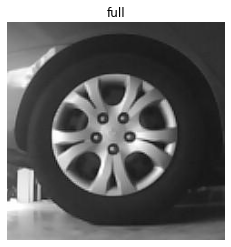

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="tire_dataset/train/",
                        target_class="full")

# Vesualize the data

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
full_img = cv2.imread('/content/tire_dataset/train/full/00000.jpg')
full_img = cv2.cvtColor(full_img,cv2.COLOR_BGR2RGB)

In [ ]:
#Check the type
type(full_img)

numpy.ndarray

In [ ]:
full_img.shape

(240, 240, 3)

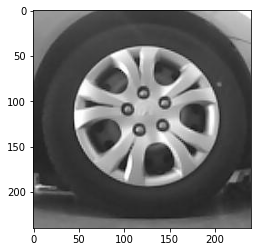

In [ ]:
plt.imshow(full_img);

Check the flat image

In [ ]:
flat_img = cv2.imread('/content/tire_dataset/train/flat/00004.jpg')
flat_img = cv2.cvtColor(flat_img,cv2.COLOR_BGRA2RGB)

In [ ]:
#Check the type
type(full_img)

numpy.ndarray

In [ ]:
full_img.shape

(240, 240, 3)

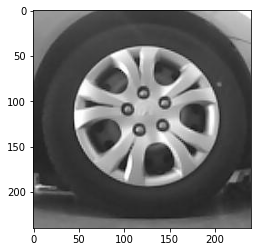

In [ ]:
plt.imshow(full_img);

#Preprosess the image and generate more data 

scale the image from 0 , 1
by deviding /255

In [ ]:
#Test the scale
img/255

array([[[0.41568627, 0.41568627, 0.41568627],
        [0.41568627, 0.41568627, 0.41568627],
        [0.41176471, 0.41176471, 0.41176471],
        ...,
        [0.17647059, 0.17647059, 0.17647059],
        [0.17254902, 0.17254902, 0.17254902],
        [0.17254902, 0.17254902, 0.17254902]],

       [[0.41568627, 0.41568627, 0.41568627],
        [0.41568627, 0.41568627, 0.41568627],
        [0.41568627, 0.41568627, 0.41568627],
        ...,
        [0.16862745, 0.16862745, 0.16862745],
        [0.16862745, 0.16862745, 0.16862745],
        [0.16470588, 0.16470588, 0.16470588]],

       [[0.41960784, 0.41960784, 0.41960784],
        [0.41960784, 0.41960784, 0.41960784],
        [0.41568627, 0.41568627, 0.41568627],
        ...,
        [0.16862745, 0.16862745, 0.16862745],
        [0.16470588, 0.16470588, 0.16470588],
        [0.16470588, 0.16470588, 0.16470588]],

       ...,

       [[0.68627451, 0.68627451, 0.68627451],
        [0.68627451, 0.68627451, 0.68627451],
        [0.68235294, 0

## Zoom , Scale , rotate ,flip , rescale

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_gen = ImageDataGenerator( rotation_range=30 , #rotate the image by 30%
                             width_shift_range=0.1, #shift the img width by max 10%
                             height_shift_range=0.1, #shift the img heigh bay max 10%
                             rescale=1/255, #rescale img by normalize it
                             shear_range=0.2, #cutting away part of the img as buffer 
                             zoom_range=0.2, #zoom in be 20%
                             horizontal_flip=True,
                             fill_mode='nearest')

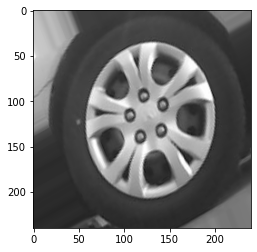

In [ ]:
plt.imshow(img_gen.random_transform(full_img));

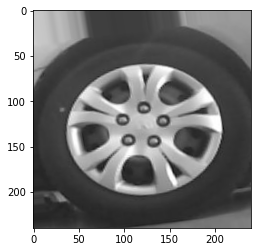

In [ ]:
plt.imshow(img_gen.random_transform(full_img))

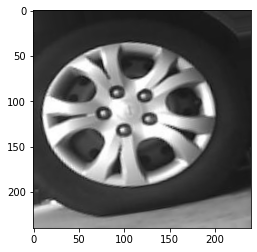

In [ ]:
plt.imshow(img_gen.random_transform(flat_img))

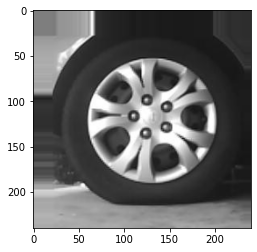

In [ ]:
plt.imshow(img_gen.random_transform(flat_img));

# Building the model 

## Model_1

build the model without add target_size=(240,240) in flow_from function

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

#Preprosses the data ( get them all in scale)
train_datagen = ImageDataGenerator( rotation_range=30 , #rotate the image by 30%
                             width_shift_range=0.1, #shift the img width by max 10%
                             height_shift_range=0.1, #shift the img heigh bay max 10%
                             rescale=1/255, #rescale img by normalize it
                             shear_range=0.2, #cutting away part of the img as buffer 
                             zoom_range=0.2, #zoom in be 20%
                             horizontal_flip=True,
                             fill_mode='nearest')

valied_datagen = ImageDataGenerator( rotation_range=30 , #rotate the image by 30%
                             width_shift_range=0.1, #shift the img width by max 10%
                             height_shift_range=0.1, #shift the img heigh bay max 10%
                             rescale=1/255, #rescale img by normalize it
                             shear_range=0.2, #cutting away part of the img as buffer 
                             zoom_range=0.2, #zoom in be 20%
                             horizontal_flip=True,
                             fill_mode='nearest')

#Setup the train and test directories
train_dir = 'tire_dataset/train/'
test_dir = 'tire_dataset/test/'

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(240,240),
                                               class_mode='categorical',
                                               seed=42)

valid_data = valied_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(240,240),
                                                class_mode='categorical',
                                                seed=42)


#Create CNN Models
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation='relu',
                        input_shape=(240,240,3)),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation='softmax') #3 class output
])

#compile Model_1
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit Model_1
history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 780 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Epoch 1/5
25/25 [==============================] - 42s 558ms/step - loss: 0.7358 - accuracy: 0.6167 - val_loss: 0.4933 - val_accuracy: 0.7417
Epoch 2/5
25/25 [==============================] - 13s 508ms/step - loss: 0.5420 - accuracy: 0.7077 - val_loss: 0.4904 - val_accuracy: 0.7750
Epoch 3/5
25/25 [==============================] - 14s 546ms/step - loss: 0.4891 - accuracy: 0.7449 - val_loss: 0.4228 - val_accuracy: 0.7833
Epoch 4/5
25/25 [==============================] - 13s 520ms/step - loss: 0.4905 - accuracy: 0.7244 - val_loss: 0.3518 - val_accuracy: 0.8667
Epoch 5/5
25/25 [==============================] - 13s 522ms/step - loss: 0.4499 - accuracy: 0.7590 - val_loss: 0.4333 - val_accuracy: 0.7750


It's good .!
Model_1 did greate job with losses = 0.45 , and accuracy of the model = 0.75

The model got ~75% accouracy on the training set , and 77% on the test set.


## Check Model_1 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 236, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 118, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32490)             0

## Model_2

run the same model but i will rehape the image size to be (224,224,3)

In [ ]:
# Set the seed 
tf.random.set_seed(42)

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)

valid_data = valied_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='categorical',
                                                seed=42)

#Create the model with tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

#Compile Model_2
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit Model_2
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 780 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Epoch 1/5
25/25 [==============================] - 12s 447ms/step - loss: 6.0584 - accuracy: 0.3397 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/5
25/25 [==============================] - 11s 426ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/5
25/25 [==============================] - 11s 428ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/5
25/25 [==============================] - 11s 426ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/5
25/25 [==============================] - 10s 421ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333


Note Work ..!

The Image shape change it make the model bad on training with 5 epochs , i will try to increes the epoch to = 20, so that the model can take more chance to learn

## Model_3

In [ ]:
#Set Seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(3,activation='softmax')
])

#Compile Model_3
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit Model_3
history_3 = model_3.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
25/25 [==============================] - 12s 455ms/step - loss: 2.5762 - accuracy: 0.3231 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/20
25/25 [==============================] - 11s 427ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/20
25/25 [==============================] - 11s 429ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/20
25/25 [==============================] - 11s 428ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/20
25/25 [==============================] - 11s 423ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/20
25/25 [==============================] - 11s 430ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/20
25/25 [==============================] - 11s 427ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333

So , It seems our model not learning anything .!

for model_4 i will try to give the model more nuron to train with 4 > 100, and add extra layers 

## Model_4

In [ ]:
#Set random Seed
tf.random.set_seed(42)

#Greate Model_4
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100 , activation='relu'),
  tf.keras.layers.Dense(100 , activation='relu'),
  tf.keras.layers.Dense(100 ,activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

#Compile Model_4
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit Model_4
history_4 = model_4.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
25/25 [==============================] - 12s 458ms/step - loss: 6.3442 - accuracy: 0.4218 - val_loss: 0.8416 - val_accuracy: 0.6167
Epoch 2/20
25/25 [==============================] - 11s 433ms/step - loss: 1.7797 - accuracy: 0.5705 - val_loss: 1.2105 - val_accuracy: 0.5417
Epoch 3/20
25/25 [==============================] - 11s 433ms/step - loss: 0.9571 - accuracy: 0.6474 - val_loss: 0.8435 - val_accuracy: 0.6250
Epoch 4/20
25/25 [==============================] - 11s 431ms/step - loss: 0.8342 - accuracy: 0.6603 - val_loss: 1.0987 - val_accuracy: 0.6000
Epoch 5/20
25/25 [==============================] - 11s 425ms/step - loss: 1.1203 - accuracy: 0.6064 - val_loss: 0.6717 - val_accuracy: 0.6583
Epoch 6/20
25/25 [==============================] - 11s 428ms/step - loss: 1.1882 - accuracy: 0.6500 - val_loss: 0.6060 - val_accuracy: 0.7250
Epoch 7/20
25/25 [==============================] - 11s 425ms/step - loss: 0.9623 - accuracy: 0.6718 - val_loss: 0.6037 - val_accuracy: 0.7083

Good job Model_4 , It's seems model_4 get grate job and learn some pattren in the data , it give 72% accouracy in training data , 72% accouracy in test data.

So , To tune the model litteil more , the 72% accourcy it's seems not vary good to me :(


**BUT**
Start from `model_5` , i will get back to Conv2d Layers , as i make `model_1` as basline model

and i will start tune the model from there.

## Model_5

I will start same `model_1` with more epochs .

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create the model
model_5= Sequential([
  tf.keras.layers.Conv2D(
      filters=10,
      kernel_size=3,
      activation='relu',
      input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3,activation='softmax')
])

#Compile Model_5
model_5.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit Model_5
history_5 = model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
25/25 [==============================] - 14s 494ms/step - loss: 0.9389 - accuracy: 0.4744 - val_loss: 0.7252 - val_accuracy: 0.6000
Epoch 2/5
25/25 [==============================] - 11s 458ms/step - loss: 0.5606 - accuracy: 0.7167 - val_loss: 0.4573 - val_accuracy: 0.8250
Epoch 3/5
25/25 [==============================] - 11s 457ms/step - loss: 0.4610 - accuracy: 0.7449 - val_loss: 0.4016 - val_accuracy: 0.8083
Epoch 4/5
25/25 [==============================] - 11s 458ms/step - loss: 0.4881 - accuracy: 0.7205 - val_loss: 0.4953 - val_accuracy: 0.7667
Epoch 5/5
25/25 [==============================] - 12s 465ms/step - loss: 0.4313 - accuracy: 0.7692 - val_loss: 0.4157 - val_accuracy: 0.7833


## Model_6 

Start from `model_5` as basline i will :

- Adjast the code 
- But the augamented data witch i create in strter of this notebook
- add more neuron 

In [ ]:
#Create Augmented data
train_data_aug = ImageDataGenerator( rotation_range=30 , #rotate the image by 30%
                             width_shift_range=0.1, #shift the img width by max 10%
                             height_shift_range=0.1, #shift the img heigh bay max 10%
                             rescale=1/255, #rescale img by normalize it
                             shear_range=0.2, #cutting away part of the img as buffer 
                             zoom_range=0.2, #zoom in be 20%
                             horizontal_flip=True,
                             fill_mode='nearest')

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_data_aug.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle


Augmented training images:
Found 780 images belonging to 3 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

In [ ]:
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Non-augmented training images:
Found 780 images belonging to 3 classes.
Unchanged test images:
Found 120 images belonging to 3 classes.


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile Model_6 
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit Model_6
history_6 = model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
25/25 [==============================] - 11s 401ms/step - loss: 0.6453 - accuracy: 0.6543 - val_loss: 0.6382 - val_accuracy: 0.6667
Epoch 2/5
25/25 [==============================] - 10s 397ms/step - loss: 0.6378 - accuracy: 0.6667 - val_loss: 0.6371 - val_accuracy: 0.6667
Epoch 3/5
25/25 [==============================] - 10s 396ms/step - loss: 0.6372 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 4/5
25/25 [==============================] - 10s 397ms/step - loss: 0.6370 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 5/5
25/25 [==============================] - 10s 399ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667


In [ ]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6760)             

### Plot Function

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

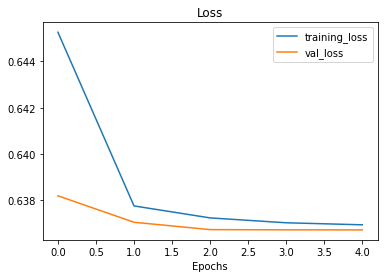

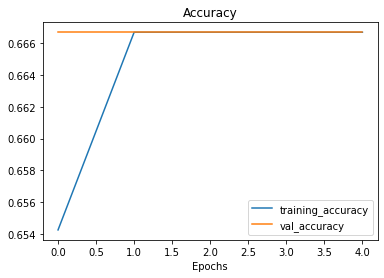

In [ ]:
plot_loss_curves(history_6)

I littel wory about overfitting , Becouse the curv of accouracy , i will try to fix it now 

## Model_7

Make the train data shuffeld

In [ ]:
print("Augmented training images:")
train_data_shuffld = train_data_aug.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)

Augmented training images:
Found 780 images belonging to 3 classes.


In [ ]:
# Set the seed 
tf.random.set_seed(42)

#Create Model_7
model_7 = Sequential([
  Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3,activation='softmax')
])

#Compile Model_7
model_7.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

#Fit the model
history_7 = model_7.fit(train_data_shuffld,
                        epochs=5,
                        steps_per_epoch=len(train_data_shuffld),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
25/25 [==============================] - 11s 405ms/step - loss: 0.9663 - accuracy: 0.4321 - val_loss: 0.6067 - val_accuracy: 0.6417
Epoch 2/5
25/25 [==============================] - 10s 392ms/step - loss: 0.5837 - accuracy: 0.6795 - val_loss: 0.4422 - val_accuracy: 0.7333
Epoch 3/5
25/25 [==============================] - 10s 393ms/step - loss: 0.5179 - accuracy: 0.7308 - val_loss: 0.4361 - val_accuracy: 0.8417
Epoch 4/5
25/25 [==============================] - 10s 390ms/step - loss: 0.5074 - accuracy: 0.7256 - val_loss: 0.4195 - val_accuracy: 0.8000
Epoch 5/5
25/25 [==============================] - 10s 391ms/step - loss: 0.4592 - accuracy: 0.7474 - val_loss: 0.3814 - val_accuracy: 0.9250


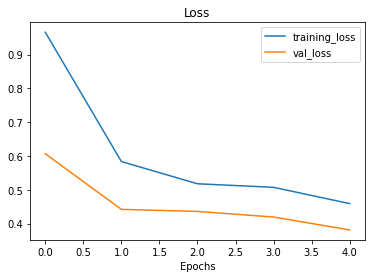

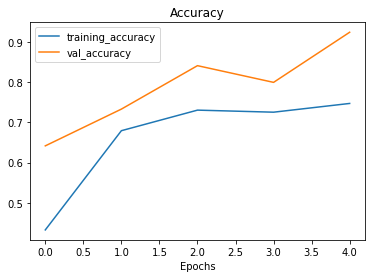

In [ ]:
plot_loss_curves(history_7)

Its Learning good , So I will Add more epoch AKA:More chance to learn

## Model_8

In [ ]:
#Set Seed
tf.random.set_seed(42)

#Create Model_8
model_8 = Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3,activation='softmax')
  ])

#Compile Model_8
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit Model_8
history_8 = model_8.fit(train_data_shuffld,
                        epochs=20,
                        steps_per_epoch=len(train_data_shuffld),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
25/25 [==============================] - 52s 402ms/step - loss: 0.9014 - accuracy: 0.5090 - val_loss: 0.5848 - val_accuracy: 0.6583
Epoch 2/20
25/25 [==============================] - 10s 394ms/step - loss: 0.5411 - accuracy: 0.7038 - val_loss: 0.4918 - val_accuracy: 0.6667
Epoch 3/20
25/25 [==============================] - 10s 392ms/step - loss: 0.5239 - accuracy: 0.7064 - val_loss: 0.4229 - val_accuracy: 0.7333
Epoch 4/20
25/25 [==============================] - 10s 390ms/step - loss: 0.4992 - accuracy: 0.7295 - val_loss: 0.4448 - val_accuracy: 0.6667
Epoch 5/20
25/25 [==============================] - 10s 395ms/step - loss: 0.4672 - accuracy: 0.7462 - val_loss: 0.3219 - val_accuracy: 0.9667
Epoch 6/20
25/25 [==============================] - 10s 391ms/step - loss: 0.4479 - accuracy: 0.7538 - val_loss: 0.3318 - val_accuracy: 0.8917
Epoch 7/20
25/25 [==============================] - 10s 390ms/step - loss: 0.4305 - accuracy: 0.7718 - val_loss: 0.2782 - val_accuracy: 0.9667

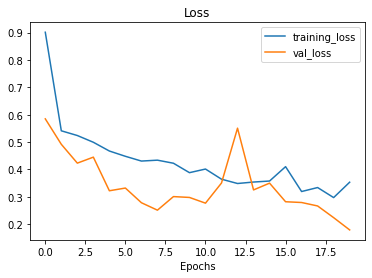

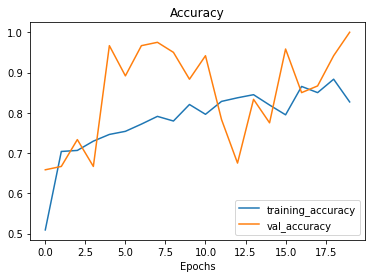

In [ ]:
plot_loss_curves(history_8)

Here are fairly Good model :)

The model got 82% accuracy ,
Let me fine tune the neroune or maybe add 1 more layer

## Model_9

In [ ]:
#Set Seed
tf.random.set_seed(42)

#Create Model_9
model_9 = Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3,activation='softmax')
  ])

#Compile Model_9
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit Model_9
history_9 = model_9.fit(train_data_shuffld,epochs=20,steps_per_epoch=len(train_data_shuffld),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/20
25/25 [==============================] - 11s 406ms/step - loss: 1.0347 - accuracy: 0.3462 - val_loss: 0.9979 - val_accuracy: 0.3333
Epoch 2/20
25/25 [==============================] - 10s 396ms/step - loss: 0.7294 - accuracy: 0.6474 - val_loss: 0.7176 - val_accuracy: 0.6667
Epoch 3/20
25/25 [==============================] - 10s 396ms/step - loss: 0.5779 - accuracy: 0.6910 - val_loss: 0.5111 - val_accuracy: 0.6000
Epoch 4/20
25/25 [==============================] - 10s 393ms/step - loss: 0.5007 - accuracy: 0.6962 - val_loss: 0.4745 - val_accuracy: 0.6917
Epoch 5/20
25/25 [==============================] - 10s 400ms/step - loss: 0.4576 - accuracy: 0.7449 - val_loss: 0.4503 - val_accuracy: 0.7583
Epoch 6/20
25/25 [==============================] - 10s 390ms/step - loss: 0.4739 - accuracy: 0.7308 - val_loss: 0.4746 - val_accuracy: 0.6083
Epoch 7/20
25/25 [==============================] - 10s 392ms/step - loss: 0.4302 - accuracy: 0.7654 - val_loss: 0.4233 - val_accuracy: 0.7833

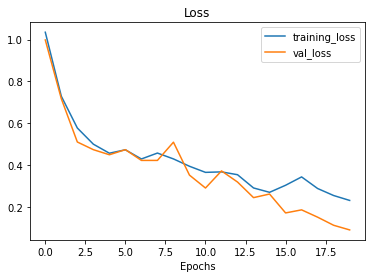

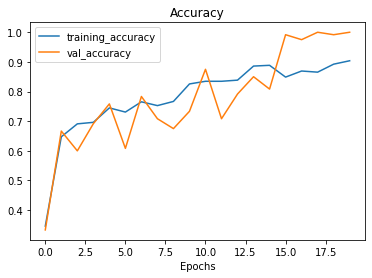

In [ ]:
plot_loss_curves(history_9)

# It's Officaly 90% Accouracy :)



Give the Model more epochs to learn , 20 > 30

## Model_10

In [ ]:
#Set Seed
tf.random.set_seed(42)

#Clone Model_9 -> Model_10
model_10 = tf.keras.models.clone_model(model_9)

#Compile Model_10
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

#Fit Model_10
history_10 = model_10.fit(train_data_shuffld,epochs=30,steps_per_epoch=len(train_data_shuffld),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/30
25/25 [==============================] - 11s 403ms/step - loss: 1.0350 - accuracy: 0.3321 - val_loss: 0.9051 - val_accuracy: 0.3167
Epoch 2/30
25/25 [==============================] - 10s 396ms/step - loss: 0.6661 - accuracy: 0.6474 - val_loss: 0.5457 - val_accuracy: 0.7833
Epoch 3/30
25/25 [==============================] - 10s 387ms/step - loss: 0.5745 - accuracy: 0.6769 - val_loss: 0.5362 - val_accuracy: 0.6667
Epoch 4/30
25/25 [==============================] - 10s 389ms/step - loss: 0.5219 - accuracy: 0.7192 - val_loss: 0.4077 - val_accuracy: 0.6833
Epoch 5/30
25/25 [==============================] - 10s 391ms/step - loss: 0.5195 - accuracy: 0.7000 - val_loss: 0.4502 - val_accuracy: 0.8083
Epoch 6/30
25/25 [==============================] - 10s 400ms/step - loss: 0.5103 - accuracy: 0.7154 - val_loss: 0.4744 - val_accuracy: 0.6667
Epoch 7/30
25/25 [==============================] - 10s 399ms/step - loss: 0.4977 - accuracy: 0.7179 - val_loss: 0.4969 - val_accuracy: 0.6583

# It's 93% Accuracy :)

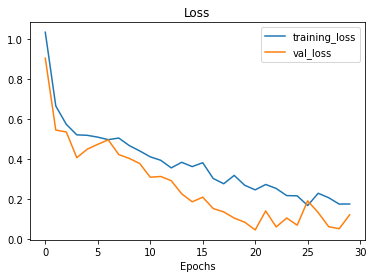

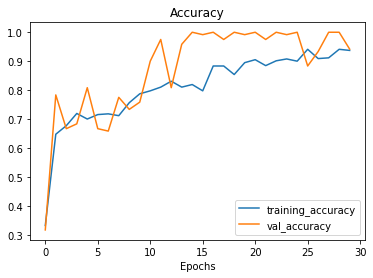

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_10.evaluate(test_data)

4/4 [==============================] - 0s 63ms/step - loss: 0.1218 - accuracy: 0.9417


[0.12184388190507889, 0.9416666626930237]

Even thow , The model_10 is overfitting in test_data.

Let's try make predection on new image

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
#Create function to scale and get the image in shape of the model
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
class_names

array(['.DS_Store', 'flat', 'full', 'no_tire'], dtype='<U9')

# Make Predection

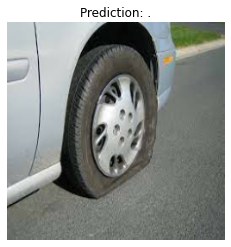

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10, 
              filename="tire0.jpeg", 
              class_names=class_names)

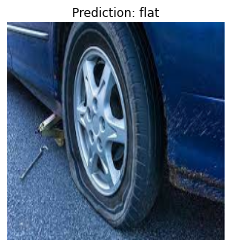

In [ ]:
pred_and_plot(model=model_10, 
              filename="tire02.jpeg", 
              class_names=class_names)

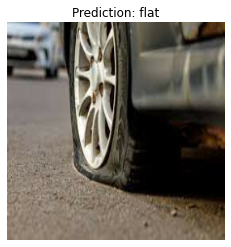

In [ ]:
pred_and_plot(model=model_10, 
              filename="tire03.jpeg", 
              class_names=class_names)

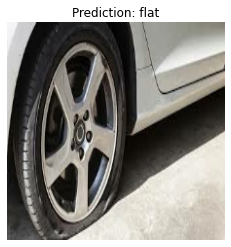

In [ ]:
pred_and_plot(model=model_10, 
              filename="tire04.jpeg", 
              class_names=class_names)

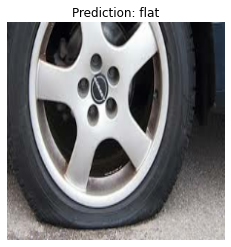

In [ ]:
pred_and_plot(model=model_10, 
              filename="tire05.jpeg", 
              class_names=class_names)

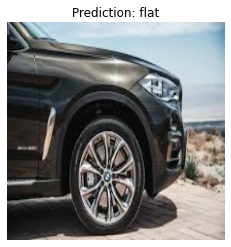

In [ ]:
pred_and_plot(model=model_10, 
              filename="tire1.jpeg", 
              class_names=class_names)

#Get the Model in tflite Format

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_10)
tflite_model = converter.convert()

# Save the model.
with open('tire_model_10.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpr6zt47bz/assets
